# Simulations of Stochastic Processes

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Simulate a generalized Weiner Process with $\mu = 20$ and $\sigma = 30$:

The stochastic differential equation for the process is $ds = 20 dt +30 dz$ where $dz$ ~ $N(0,dt)$

In [2]:
def gen_weiner(mu,sig,T,n,S0):
    dt =T/n
    S = [S0]
    for i in range(n):
        ds = mu*dt+sig*np.random.normal()*(dt**0.5)
        S.append(S[-1]+ds)
    return S

In [3]:
mu =20
sig=30
s0 =100

T=1
n=1000

In [4]:
s_values =gen_weiner(mu,sig,T,n,s0)

In [5]:
t_values = [T/n*x for x in range(n+1)]

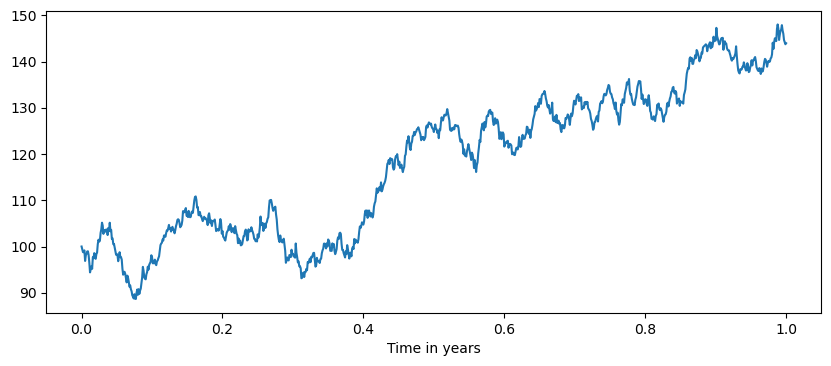

In [6]:
plt.figure(figsize=(10,4),dpi=100)
plt.xlabel('Time in years')
plt.plot(t_values,s_values)

This is one realization of the stochastic process. By simulating n times we will be able to find the probability distribution. The generalized weiner process generates a normal random variable ~ $N(\mu t,\sigma^2 t)$ 

In [7]:
x = [gen_weiner(mu,sig,T,n,s0)[-1] for i in range(10000)]

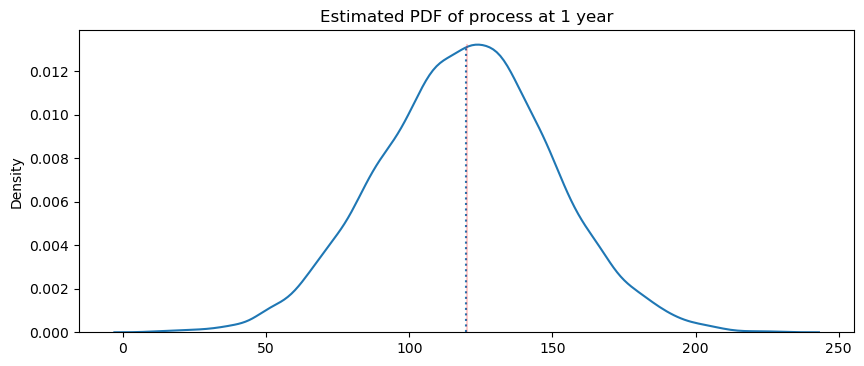

In [8]:
plt.figure(figsize=(10,4),dpi=100)
plt.title('Estimated PDF of process at 1 year')
sns.kdeplot(x)
plt.axvline(np.mean(x),ls=':',ymax=0.95,label ='Mean')
plt.axvline(120,ls='-',ymax=0.95,label ='Mean',color='r',alpha =0.2)

The kde plot looks approximately normal. The expected value and variance of the simulation is 119.8, 886.78. The true mean and variance of the process after 1 year is equal to 120, 900.

Compute the mean and the 95% confidence interval for the process after 6 months using simulation

In [9]:
x = [gen_weiner(mu,sig,0.5,n,s0)[-1] for i in range(10000)]

In [10]:
print(f'The mean of the process after six months based on simulation is {round(np.mean(x),2)}')

The mean of the process after six months based on simulation is 110.06


The true mean of the process after 6 months is 110.

In [11]:
print(f'The 95% confidence interval for the process after six months is ({round(sorted(x)[500],2)},{round(sorted(x)[9500],2)})')

The 95% confidence interval for the process after six months is (75.52,145.07)


If $S$ follows a geometric browian motion, simulate the following processes:  
$a)$ $ y = 2S$  
$b)$ $ y = S^2$  
$c)$ $ y = e^S$  
$d)$ $y = e^{r(T-t)}/S$

$S$ follows a geometric brownian motion. $dS = \mu S dt +\sigma S dX$ where $dX$ follows a brownian motion process with mean $0$ and variance $dt$. Taking inital stock price $S$ = 10, $\mu$ = 20%, $\sigma$ = 30%, $r$ = 6%, $T$ = 1

In [12]:
def geo_brownian(mu,sig,T,n,S0=10):
    dt =T/n
    S = [S0]
    for i in range(n):
        ds = mu*S[-1]*dt+sig*S[-1]*np.random.normal()*(dt**0.5)
        S.append(S[-1]+ds)
    return S

In [13]:
t_values = np.array([1/1000*x for x in range(1001)])

In [14]:
s_values = np.array(geo_brownian(0.2,0.3,1,1000))

In [15]:
y_2s = 2*s_values
y_s_sq = s_values**2
y_exp_s = np.exp(s_values)
y_exp_by_S = np.exp(0.06*(1-t_values))/s_values

Text(0.5, 1.0, 'S')

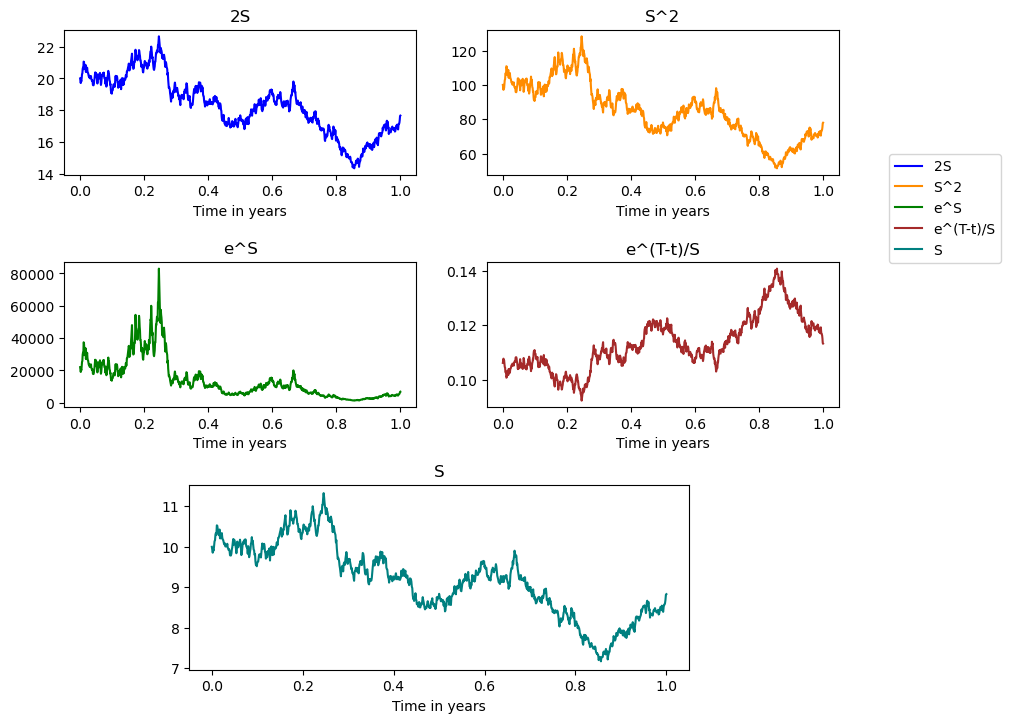

In [16]:
fig,ax = plt.subplots(2,2,figsize=(10,5),dpi=100)
f1 =ax[0,0].plot(t_values,y_2s,color ='blue')
f2 =ax[0,1].plot(t_values,y_s_sq,color ='darkorange')
f3 =ax[1,0].plot(t_values,y_exp_s,color ='green')
f4 =ax[1,1].plot(t_values,y_exp_by_S,color ='brown')
fig.subplots_adjust(hspace=0.6)
a5 = fig.add_axes([0.25,-0.40,0.5,0.37])
labels =['2S','S^2','e^S','e^(T-t)/S','S']
f5 = a5.plot(t_values,s_values,color ='teal')[0]
plt.legend([f1[0],f2[0],f3[0],f4[0],f5],labels,loc =(1.4,2.2))

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel('Time in years')
        ax[i,j].set_title(labels[i*2+j])
a5.set_xlabel('Time in years')
a5.set_title('S')

### Simulation of correlated stock prices:

In [17]:
#Stock A
Sa = 30
Ma = 0.11 # Mean return of stock A
Vola = 0.25 #Volatility

In [18]:
#Stock B
Sb = 40
Mb = 0.15 # Mean return of stock A
Volb = 0.3 #Volatility

The stocks are correlated with correlation p given by

In [19]:
p = [0.25,0.5,0.95]

In [20]:
def bivariate_nrv(p):
    x1 = np.random.normal()
    x2 = p*x1 + ((1-p**2)**0.5)*np.random.normal()
    return x1,x2

In [21]:
x = [bivariate_nrv(p[1]) for x in range(10000)]

In [22]:
x1= list(zip(*x))[0]
x2= list(zip(*x))[1]

In [23]:
np.corrcoef(x1,x2)

array([[1.        , 0.49572397],
       [0.49572397, 1.        ]])

The stocks are assumed to follow geometric brownian motion. That is  
$dS_a = \mu_a S_a dt+ \sigma_a S_a dX_a$ and  
$dS_b = \mu_b S_b dt+ \sigma_b S_b dX_b$ where $dX_a$ and $dX_b$ are correlated processes with correlation of p

In [29]:
def cor_prices(p,t,n):
    s1 = [Sa]
    s2 = [Sb]
    dt = t/n
    for i in range(1,n+1):
        x =bivariate_nrv(p)
        '''
        ds1 = Ma*s1[-1]*dt+Vola*s1[-1]*x[0]*(dt**0.5)
        ds2 = Mb*s2[-1]*dt+Volb*s2[-1]*x[1]*(dt**0.5)
        s1.append(s1[-1]+ds1)
        s2.append(s2[-1]+ds2)
        '''
        s1.append(s1[-1]*np.exp((Ma-0.5*(Vola**2))*(dt)+Vola*((dt)**0.5)*x[0]))
        s2.append(s2[-1]*np.exp((Mb-0.5*(Volb**2))*(dt)+Volb*((dt)**0.5)*x[1]))
   
    return s1,s2
        

In [25]:
t_values = [x/365 for x in range(92)]

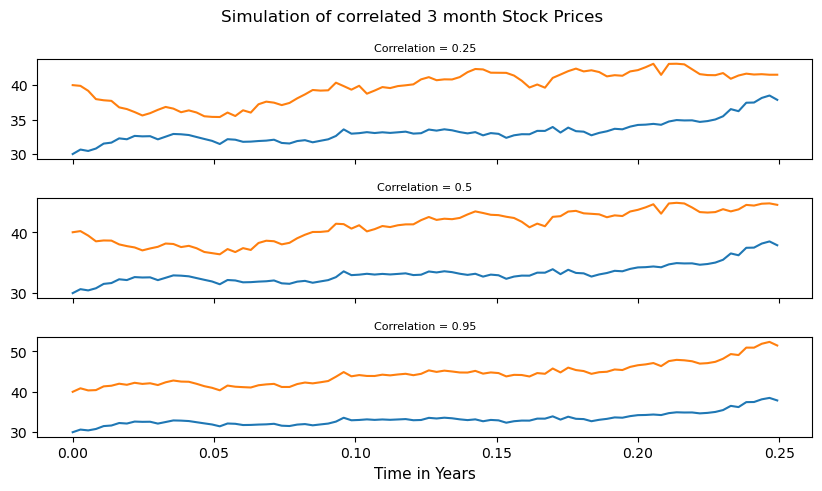

In [30]:
fig,ax = plt.subplots(3,1,figsize=(10,5),dpi=100,sharex=True)
for i in range(3):
    np.random.seed(1)
    x = cor_prices(p[i],91/365,91)
    ax[i].plot(t_values,x[0])
    ax[i].plot(t_values,x[1])
    ax[i].set_title(f'Correlation = {p[i]}',fontsize=8)
ax[2].set_xlabel('Time in Years',fontsize=11)
plt.suptitle('Simulation of correlated 3 month Stock Prices')
fig.subplots_adjust(hspace=0.4)
    